# **Research paper implementation**

**Done By:**

*   Tushar Jindal 18csu218
*   Saurabh Chauhan 18csu201
*   Vaibhav Saini 18csu225



**Importing all the required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error,accuracy_score
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import csv
import collections
from datetime import datetime


Mounting to google drive to fetch our Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/RELIANCE.csv')

In [ ]:
df

,Date,Open,Close,Low,High,Volume,Name
0,03-01-2000,237.50,251.70,237.50,251.70,4456424,RELIANCE
1,04-01-2000,258.40,271.85,251.30,271.85,9487878,RELIANCE
2,05-01-2000,256.65,282.50,256.65,287.90,26833684,RELIANCE
3,06-01-2000,289.00,294.35,289.00,300.70,15682286,RELIANCE
4,07-01-2000,295.00,314.55,293.00,317.90,19870977,RELIANCE
...,...,...,...,...,...,...,...
5199,23-11-2020,1951.00,1950.70,1926.25,1970.00,20918665,RELIANCE
5200,24-11-2020,1964.00,1964.05,1932.00,1974.00,14277083,RELIANCE
5201,25-11-2020,1980.00,1947.80,1942.20,1992.95,15062376,RELIANCE
5202,26-11-2020,1953.05,1952.60,1930.05,1965.00,11924527,RELIANCE


# Data Preprocessing

In [ ]:
X = df.drop(['Close','Date','Name'],axis=1)
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(3642, 4)

In [ ]:
X_test.shape

(1562, 4)

In [ ]:
y_train.shape

(3642,)

In [ ]:
y_test.shape

(1562,)

# Linear model: multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([ 354.38902592, 1103.13800094, 1492.01674752, ...,  731.45406176,
       1277.64544072,  477.96545294])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

149.4331935033215

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

12.2242870345604

In [ ]:
y_pred.shape

(1562,)

## Non Linear Model: CNN Sliding Window Model

In [ ]:
df = pd.read_csv('drive/MyDrive/RELIANCE.csv')

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Name
0,2000-01-03,237.50,251.70,237.50,251.70,4456424,RELIANCE
1,2000-01-04,258.40,271.85,251.30,271.85,9487878,RELIANCE
2,2000-01-05,256.65,287.90,256.65,282.50,26833684,RELIANCE
3,2000-01-06,289.00,300.70,289.00,294.35,15682286,RELIANCE
4,2000-01-07,295.00,317.90,293.00,314.55,19870977,RELIANCE


In [ ]:
df = df.drop(columns=['Date','Name'])

In [ ]:
df.head()

,Open,High,Low,Close,Volume
0,237.50,251.70,237.50,251.70,4456424
1,258.40,271.85,251.30,271.85,9487878
2,256.65,287.90,256.65,282.50,26833684
3,289.00,300.70,289.00,294.35,15682286
4,295.00,317.90,293.00,314.55,19870977


Text(0.5, 1.0, 'Reliance Closing Price')

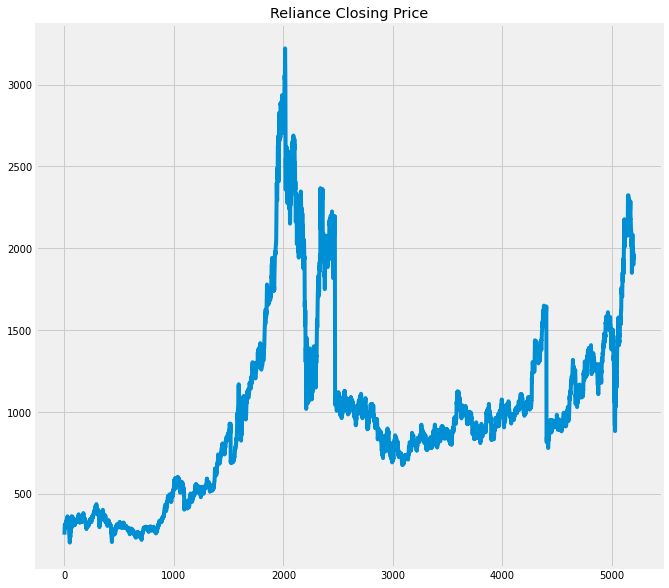

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df['Close'])
plt.title("Reliance Closing Price")

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)   

y_close = df[:,1]

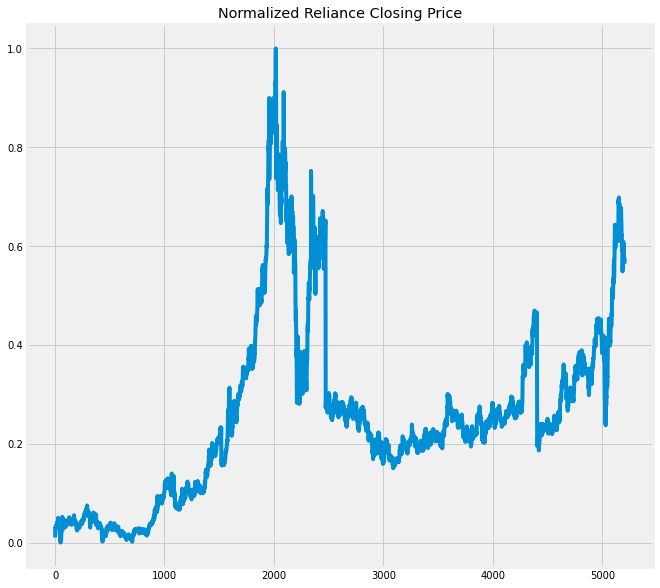

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y_close)
plt.title("Normalized Reliance Closing Price")
plt.show()

In [ ]:
ntrain = int(len(y_close)*0.8) 

train = df[0:ntrain]
test  = df[ntrain:len(df)]

y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain:len(y_close)]

In [ ]:
y_close_test.shape

(1041,)

In [ ]:
import numpy as np

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = 10

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))


Shape of x_train: (4152, 10, 1, 5)
Shape of x_test: (1030, 10, 1, 5)
Shape of y_train: (4152,)
Shape of y_test: (1030,)


In [ ]:
x_train[0]

array([[[0.01034762, 0.01045964, 0.01370514, 0.01607211, 0.06756266]],

       [[0.0171059 , 0.01700503, 0.01839241, 0.02274949, 0.14475816]],

       [[0.01654002, 0.02221861, 0.02020957, 0.02627873, 0.41088762]],

       [[0.02700081, 0.02637648, 0.03119746, 0.03020562, 0.23979638]],

       [[0.02894099, 0.03196362, 0.03255609, 0.03689957, 0.30406172]],

       [[0.03618432, 0.03222349, 0.03673386, 0.0348947 , 0.20504191]],

       [[0.03312854, 0.02970603, 0.02944823, 0.02826703, 0.1916519 ]],

       [[0.02700081, 0.02777327, 0.02887081, 0.03264129, 0.18498072]],

       [[0.03249798, 0.03147637, 0.03632627, 0.03600484, 0.26118019]],

       [[0.03362975, 0.03318174, 0.03816042, 0.0374795 , 0.20570985]]])

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

In [ ]:
print(x_train.shape)

(4152, 1, 10, 5)


In [ ]:
x_train[0][0].shape

(10, 5)

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size = (1, 2), strides = (1, 1),  padding = 'valid', 
               activation = 'relu', input_shape = (1,10,5)))
cnn.add(MaxPooling2D(pool_size = (1,2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="relu"))
cnn.summary()   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 9, 8)           88        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,265
Trainable params: 2,265
Non-trainable params: 0
______________________________________________________

In [ ]:
cnn.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="CNN_Parameters.hdf5", verbose=0, save_best_only=True) # save best model

In [ ]:
history = cnn.fit(x_train,y_train,validation_split=0.2,batch_size = 128, callbacks=[checkpointer],verbose=1,epochs = 100)

Epoch 1/100
26/26 [==============================] - 1s 22ms/step - loss: 0.0454 - val_loss: 1.1252e-04
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 2.0664e-04
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 9.6451e-05
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 2.6339e-04
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 9.3016e-05
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 1.7220e-04
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 8.6093e-05
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 9.1526e-05
Epoch 9/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 1.2709e-04
Epoch 10/100
26/26 [==============================] - 0s 4ms/step - loss

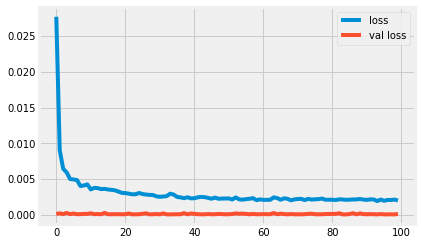

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

In [ ]:
cnn.load_weights('CNN_Parameters.hdf5')

pred = cnn.predict(x_test)
print(pred.shape)

(1030, 1)


In [ ]:
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("RMSE Score: {}".format(score))

RMSE Score: 0.020540780226015055


In [ ]:
y_test

array([0.28859834, 0.28871204, 0.28812733, ..., 0.56992042, 0.57607601,
       0.56699691])

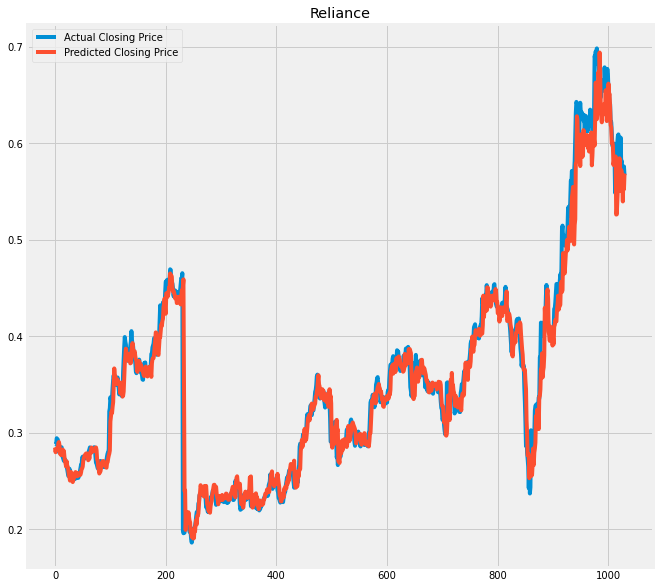

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(y_test, label = 'Actual Closing Price')
plt.plot(pred,   label = 'Predicted Closing Price')
plt.title("Reliance")
plt.legend()
plt.show()

<b>Since Our non linear model is performing better than our linear model therefore we will use non linear model for our further analysis and trainings</b>

We will further Test some other Non linear models to see which models gives the best performance 

## ANN

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/RELIANCE.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Name
0,2000-01-03,237.50,251.70,237.50,251.70,4456424,RELIANCE
1,2000-01-04,258.40,271.85,251.30,271.85,9487878,RELIANCE
2,2000-01-05,256.65,287.90,256.65,282.50,26833684,RELIANCE
3,2000-01-06,289.00,300.70,289.00,294.35,15682286,RELIANCE
4,2000-01-07,295.00,317.90,293.00,314.55,19870977,RELIANCE
...,...,...,...,...,...,...,...
5199,2020-11-23,1951.00,1970.00,1926.25,1950.70,20918665,RELIANCE
5200,2020-11-24,1964.00,1974.00,1932.00,1964.05,14277083,RELIANCE
5201,2020-11-25,1980.00,1992.95,1942.20,1947.80,15062376,RELIANCE
5202,2020-11-26,1953.05,1965.00,1930.05,1952.60,11924527,RELIANCE


In [ ]:
X = df.drop(['Close','Date','Name'],axis=1)
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(3642, 4)

In [ ]:
X_test.shape

(1562, 4)

In [ ]:
y_train.shape

(3642,)

# Creating the Model

In [ ]:
model1 = Sequential()

model1.add(Dense(4,activation='relu'))
model1.add(Dense(60,activation='relu'))
model1.add(Dense(60,activation='relu'))
model1.add(Dense(60,activation='tanh'))
model1.add(Dense(60,activation='relu'))
model1.add(Dense(60,activation='relu'))
model1.add(Dense(60,activation='relu'))

model1.add(Dense(1))

model1.compile(optimizer='adam',loss='mse')

# Training the Model

In [ ]:
%%time
model1.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
29/29 [==============================] - 1s 12ms/step - loss: 1301039.3875 - val_loss: 1287234.5000
Epoch 2/400
29/29 [==============================] - 0s 5ms/step - loss: 1283465.7125 - val_loss: 1097811.6250
Epoch 3/400
29/29 [==============================] - 0s 5ms/step - loss: 969841.4833 - val_loss: 460028.2812
Epoch 4/400
29/29 [==============================] - 0s 6ms/step - loss: 401328.8792 - val_loss: 310712.6875
Epoch 5/400
29/29 [==============================] - 0s 6ms/step - loss: 294636.1411 - val_loss: 265210.0000
Epoch 6/400
29/29 [==============================] - 0s 5ms/step - loss: 226142.3464 - val_loss: 78812.5938
Epoch 7/400
29/29 [==============================] - 0s 6ms/step - loss: 53783.1393 - val_loss: 16728.8457
Epoch 8/400
29/29 [==============================] - 0s 6ms/step - loss: 12415.3830 - val_loss: 7106.6777
Epoch 9/400
29/29 [==============================] - 0s 6ms/step - loss: 5205.4570 - val_loss: 4581.1714
Epoch 10/400
29/29 [====

In [ ]:
losses = pd.DataFrame(model1.history.history)

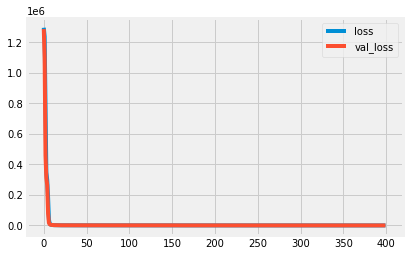

In [ ]:
losses.plot()

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
X_test

array([[0.04757068, 0.04648237, 0.04972942, 0.04775499],
       [0.30391061, 0.29644099, 0.30546119, 0.10998337],
       [0.43863213, 0.42539315, 0.44039469, 0.07282217],
       ...,
       [0.17758592, 0.17228936, 0.17931953, 0.12253846],
       [0.36343321, 0.35373283, 0.36599689, 0.11700826],
       [0.09128153, 0.08621089, 0.09471294, 0.04279062]])

In [ ]:
predictions = model1.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,predictions)

In [ ]:
np.sqrt(mse)

13.204090721575254

In [ ]:
predictions=predictions.reshape(predictions.shape[0],)
predictions.shape

(1562,)

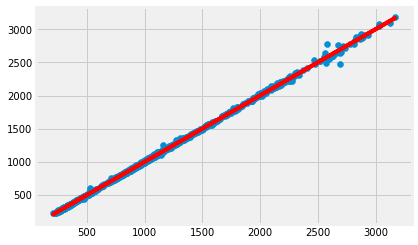

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

# Using RNN for predicting the price of stocks

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Reliance Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Reliance Stock Price')
    plt.title('Reliance Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Reliance Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/RELIANCE.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2000-01-03,237.50,251.70,237.50,251.70,4456424,RELIANCE
2000-01-04,258.40,271.85,251.30,271.85,9487878,RELIANCE
2000-01-05,256.65,287.90,256.65,282.50,26833684,RELIANCE
2000-01-06,289.00,300.70,289.00,294.35,15682286,RELIANCE
2000-01-07,295.00,317.90,293.00,314.55,19870977,RELIANCE


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,3:4].values
test_set = dataset['2017':].iloc[:,3:4].values

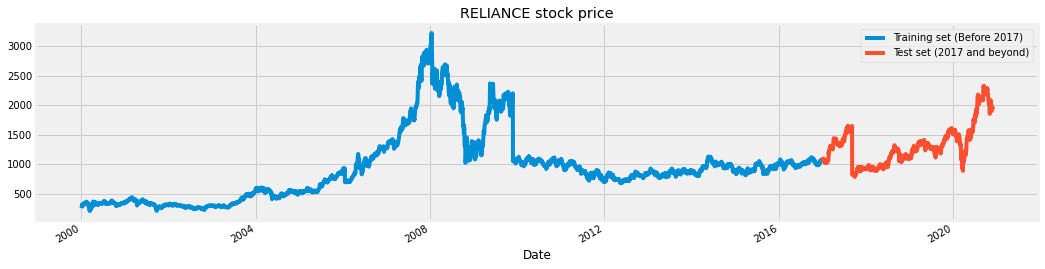

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["Close"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["Close"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('RELIANCE stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since RNN store short term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(2709, 60, 1)

In [ ]:
y_train.shape

(2709,)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],1)))

regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')


In [ ]:
regressor.fit(X_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
85/85 [==============================] - 16s 112ms/step - loss: 0.0285
Epoch 2/100
85/85 [==============================] - 10s 112ms/step - loss: 0.0025
Epoch 3/100
85/85 [==============================] - 10s 114ms/step - loss: 0.0028
Epoch 4/100
85/85 [==============================] - 10s 113ms/step - loss: 0.0021
Epoch 5/100
85/85 [==============================] - 10s 114ms/step - loss: 0.0023
Epoch 6/100
85/85 [==============================] - 10s 115ms/step - loss: 0.0020
Epoch 7/100
85/85 [==============================] - 10s 116ms/step - loss: 0.0018
Epoch 8/100
85/85 [==============================] - 10s 117ms/step - loss: 0.0019
Epoch 9/100
85/85 [==============================] - 10s 116ms/step - loss: 0.0019
Epoch 10/100
85/85 [==============================] - 10s 116ms/step - loss: 0.0020
Epoch 11/100
85/85 [==============================] - 10s 117ms/step - loss: 0.0018
Epoch 12/100
85/85 [==============================] - 10s 117ms/step - loss: 0.0015
E

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["Close"][:'2016'],dataset["Close"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,1029):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

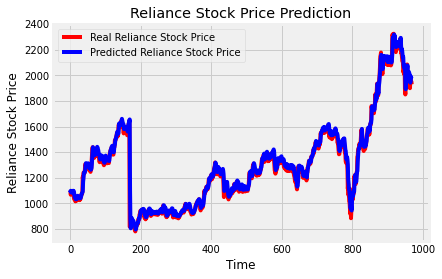

In [ ]:
# Visualizing the results for RNN
plot_predictions(test_set,predicted_stock_price)

In [ ]:
#Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 42.25192160459433.


# Using LSTMs for predicting the price of stocks

In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,3:4].values
test_set = dataset['2017':].iloc[:,3:4].values

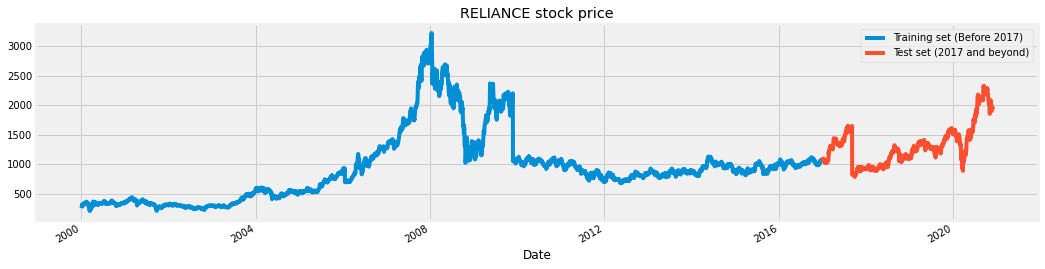

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["Close"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["Close"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('RELIANCE stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(2709, 60, 1)

In [ ]:
y_train.shape

(2709,)

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 17s 116ms/step - loss: 0.0189
Epoch 2/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0041
Epoch 3/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0036
Epoch 4/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0037
Epoch 5/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0036
Epoch 6/50
85/85 [==============================] - 11s 124ms/step - loss: 0.0028
Epoch 7/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0024
Epoch 8/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0022
Epoch 9/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0022
Epoch 10/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0020
Epoch 11/50
85/85 [==============================] - 11s 124ms/step - loss: 0.0021
Epoch 12/50
85/85 [==============================] - 11s 124ms/step - loss: 0.0021
Epoch 13/50
8

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["Close"][:'2016'],dataset["Close"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,1029):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

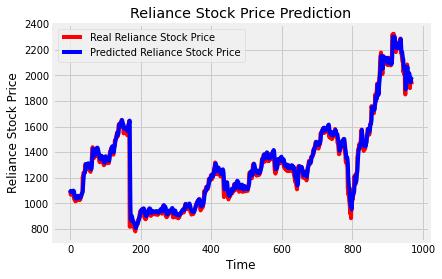

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
#Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 45.47787675616713.


In [ ]:
test_set.shape

(969, 1)

## GRU

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=60, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 12s 239ms/step - loss: 0.0762
Epoch 2/50
19/19 [==============================] - 5s 241ms/step - loss: 0.0368
Epoch 3/50
19/19 [==============================] - 5s 243ms/step - loss: 0.0148
Epoch 4/50
19/19 [==============================] - 5s 243ms/step - loss: 0.0037
Epoch 5/50
19/19 [==============================] - 5s 242ms/step - loss: 0.0027
Epoch 6/50
19/19 [==============================] - 5s 240ms/step - loss: 0.0024
Epoch 7/50
19/19 [==============================] - 5s 242ms/step - loss: 0.0025
Epoch 8/50
19/19 [==============================] - 5s 243ms/step - loss: 0.0027
Epoch 9/50
19/19 [==============================] - 5s 255ms/step - loss: 0.0027
Epoch 10/50
19/19 [==============================] - 5s 236ms/step - loss: 0.0024
Epoch 11/50
19/19 [==============================] - 5s 239ms/step - loss: 0.0021
Epoch 12/50
19/19 [==============================] - 4s 234ms/step - loss: 0.0022
Epoch 13/50
19/19 [=====

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,1029):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

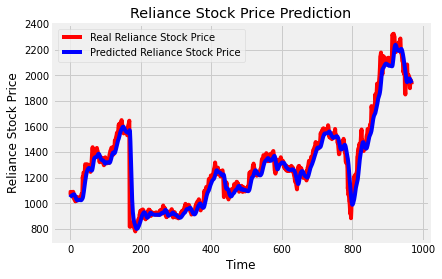

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 78.88104529857085.


As we can see, out of all the different neural network architectures, CNN is the best at learning patterns as it creates hierarchies within data by layering on filters, and its connections tend to regularize itself, thus reducing the possibility of overfitting.So, moving forward, we'll check for common inner dynamics between foreign markets, using CNN only.


# Using the trained weights on Wipro stock

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/WIPRO.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Symbol
0,2000-01-03,2724.00,2724.20,2724.00,2724.20,1599,WIPRO
1,2000-01-04,2942.15,2942.15,2942.15,2942.15,4392,WIPRO
2,2000-01-05,2942.15,3177.55,2715.00,2990.10,132297,WIPRO
3,2000-01-06,3144.70,3183.00,2790.00,2932.25,72840,WIPRO
4,2000-01-07,2751.00,2751.00,2697.70,2697.70,10110,WIPRO
...,...,...,...,...,...,...,...
5199,2020-11-23,348.00,357.40,346.00,355.85,10333347,WIPRO
5200,2020-11-24,359.00,361.40,355.00,355.50,10092441,WIPRO
5201,2020-11-25,357.90,358.80,349.55,350.00,6812338,WIPRO
5202,2020-11-26,351.00,356.40,347.20,354.85,7366370,WIPRO


In [ ]:
df = df.drop(columns=['Date','Symbol'])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)   

y_close = df[:,1]

In [ ]:
ntrain = int(len(y_close)*0.8) 

train = df[0:ntrain]
test  = df[ntrain:len(df)]

y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain:len(y_close)]

In [ ]:
y_close_test.shape

(1041,)

In [ ]:

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = 10

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (4152, 10, 1, 5)
Shape of x_test: (1030, 10, 1, 5)
Shape of y_train: (4152,)
Shape of y_test: (1030,)


In [ ]:
x_train[0]

array([[[2.51391493e-01, 2.50804380e-01, 2.92463750e-01, 2.71811440e-01,
         4.57171997e-06]],

       [[2.72806251e-01, 2.72216846e-01, 3.17341301e-01, 2.94935863e-01,
         2.59959043e-05]],

       [[2.72806251e-01, 2.95343685e-01, 2.91437401e-01, 3.00023342e-01,
         1.00711309e-03]],

       [[2.92689631e-01, 2.95879120e-01, 2.99990307e-01, 2.93885476e-01,
         5.51037999e-04]],

       [[2.54041956e-01, 2.53437342e-01, 2.89464531e-01, 2.68999798e-01,
         6.98568016e-05]],

       [[2.48809746e-01, 2.69402131e-01, 2.79691411e-01, 2.69387062e-01,
         3.02063357e-04]],

       [[2.52373146e-01, 2.57170646e-01, 2.65237001e-01, 2.46480143e-01,
         3.46522566e-04]],

       [[2.38237344e-01, 2.39388328e-01, 2.65208491e-01, 2.54697563e-01,
         1.46003554e-04]],

       [[2.36666699e-01, 2.40567266e-01, 2.62357523e-01, 2.45928425e-01,
         1.38662721e-04]],

       [[2.38237344e-01, 2.37619920e-01, 2.56085392e-01, 2.47795779e-01,
         1.4888005

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

In [ ]:
print(x_train.shape)

(4152, 1, 10, 5)


In [ ]:
x_train[0][0].shape

(10, 5)

In [ ]:
cnn.load_weights('CNN_Parameters.hdf5')

pred = cnn.predict(x_test)
print(pred.shape)

(1030, 1)


In [ ]:
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("RMSE Score: {}".format(score))

RMSE Score: 0.016661140253285488


In [ ]:
y_test

array([0.0303331 , 0.03080959, 0.03063275, ..., 0.01867143, 0.018416  ,
       0.01818021])

# JSW Steel Stock

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/JSWSTEEL.csv' )

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Symbol
0,2005-03-23,455.00,458.50,383.60,390.15,2087710,JSWSTL
1,2005-03-24,392.85,398.50,357.50,369.20,1226479,JSWSTL
2,2005-03-28,376.70,394.05,375.00,378.85,1235794,JSWSTL
3,2005-03-29,382.90,383.80,363.25,368.05,624072,JSWSTL
4,2005-03-30,367.00,371.90,360.05,362.15,466349,JSWSTL
...,...,...,...,...,...,...,...
3887,2020-11-23,338.25,342.30,336.00,337.75,4559744,JSWSTEEL
3888,2020-11-24,338.90,342.25,334.10,340.85,5014303,JSWSTEEL
3889,2020-11-25,343.50,345.90,337.00,338.25,6195795,JSWSTEEL
3890,2020-11-26,338.50,362.20,336.00,359.20,10967276,JSWSTEEL


In [ ]:
df = df.drop(columns=['Date','Symbol'])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)   

y_close = df[:,1]

In [ ]:
ntrain = int(len(y_close)*0.8) 

train = df[0:ntrain]
test  = df[ntrain:len(df)]

y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain:len(y_close)]

In [ ]:
y_close_test.shape

(779,)

In [ ]:

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = 10

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3102, 10, 1, 5)
Shape of x_test: (768, 10, 1, 5)
Shape of y_train: (3102,)
Shape of y_test: (768,)


In [ ]:
x_train[0]

array([[[0.18011382, 0.17962644, 0.14683781, 0.14487325, 0.04676399]],

       [[0.1442066 , 0.14514368, 0.1315751 , 0.1327061 , 0.02738272]],

       [[0.13487593, 0.14258621, 0.14180872, 0.13831054, 0.02759234]],

       [[0.13845798, 0.1366954 , 0.13493757, 0.13203821, 0.01382606]],

       [[0.12927175, 0.12985632, 0.13306628, 0.12861167, 0.01027663]],

       [[0.12869399, 0.13163793, 0.13107804, 0.12881494, 0.02685468]],

       [[0.12869399, 0.14399425, 0.13385574, 0.14568633, 0.02355276]],

       [[0.14429327, 0.14255747, 0.14011286, 0.13529053, 0.00787531]],

       [[0.13441373, 0.1333046 , 0.13537616, 0.13070244, 0.00607884]],

       [[0.12927175, 0.13215517, 0.13713049, 0.13427418, 0.00636712]]])

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

In [ ]:
print(x_train.shape)

(3102, 1, 10, 5)


In [ ]:
x_train[0][0].shape

(10, 5)

In [ ]:
cnn.load_weights('CNN_Parameters.hdf5')

pred = cnn.predict(x_test)
print(pred.shape)

(768, 1)


In [ ]:
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("RMSE Score: {}".format(score))

RMSE Score: 0.016151207735118064


In [ ]:
y_test

array([0.06862069, 0.06727011, 0.06841954, 0.07091954, 0.07109195,
       0.06698276, 0.06948276, 0.07051724, 0.07043103, 0.07244253,
       0.07166667, 0.06954023, 0.06841954, 0.07387931, 0.07241379,
       0.06971264, 0.06824713, 0.0654023 , 0.07002874, 0.07011494,
       0.0712931 , 0.07146552, 0.07318966, 0.07008621, 0.06864943,
       0.0662931 , 0.06436782, 0.06402299, 0.06422414, 0.06235632,
       0.06057471, 0.05798851, 0.06094828, 0.06402299, 0.06181034,
       0.06258621, 0.06163793, 0.05853448, 0.06114943, 0.06479885,
       0.06497126, 0.06813218, 0.06899425, 0.06928161, 0.07048851,
       0.07094828, 0.07451149, 0.07347701, 0.07227011, 0.07014368,
       0.07258621, 0.07813218, 0.08272989, 0.0825    , 0.0825    ,
       0.07991379, 0.08034483, 0.08264368, 0.08445402, 0.0812931 ,
       0.08106322, 0.08221264, 0.07882184, 0.07905172, 0.08813218,
       0.08623563, 0.08681034, 0.0887931 , 0.08445402, 0.08508621,
       0.09244253, 0.09678161, 0.08850575, 0.08238506, 0.08531

# Now to check for common inner dynamics between National Stock Exchange and New York Stock Exchange

In [ ]:
df = pd.read_csv('drive/MyDrive/AT&T.csv')

In [ ]:
df = df.drop(columns=['Date','Name'])

In [ ]:
df.head()

,Open,Close,Low,High,Volume
0,48.5625,47.0000,46.6250,49.00,5791900
1,47.0625,44.2500,43.5000,47.75,7173600
2,45.0000,44.9375,44.4375,45.25,9090000
3,44.5625,43.7500,43.1250,45.00,7153600
4,44.5625,44.1250,43.3750,44.75,5885600


Text(0.5, 1.0, 'AT&T Closing Price')

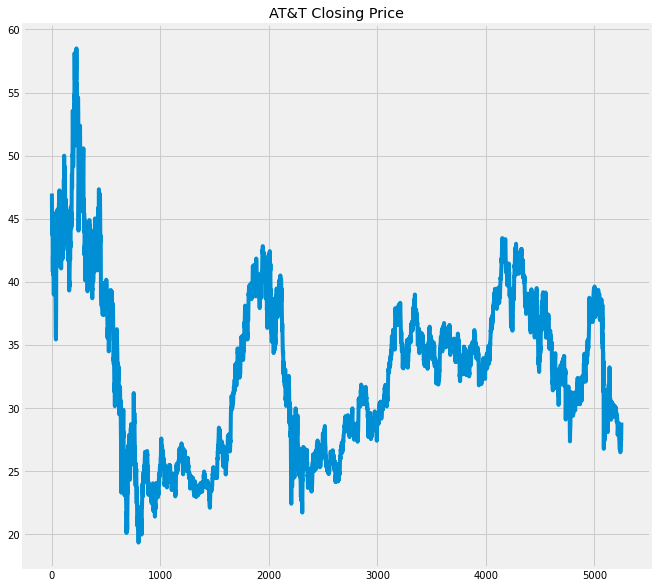

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df['Close'])
plt.title("AT&T Closing Price")

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df) 

y_close = df[:,1]

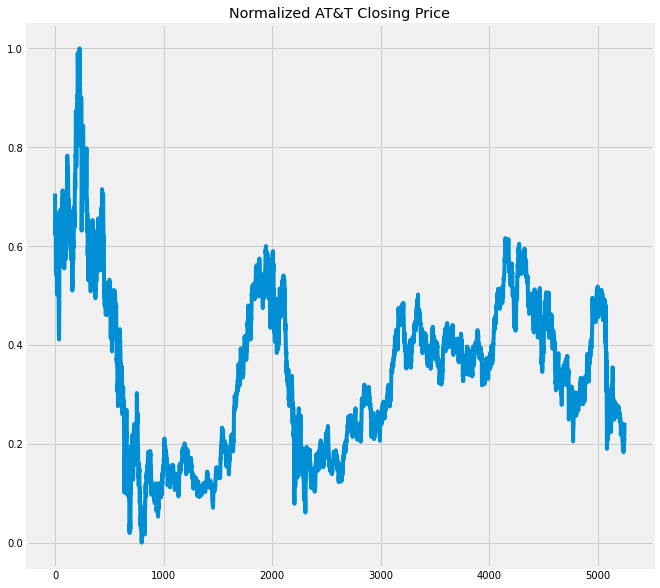

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(y_close)
plt.title("Normalized AT&T Closing Price")
plt.show()

In [ ]:
ntrain = int(len(y_close)*0.8) 

train = df[0:ntrain]
test  = df[ntrain:len(df)]

y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain:len(y_close)]

In [ ]:
y_close_test.shape

(1050,)

In [ ]:

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = 10

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))


Shape of x_train: (4188, 10, 1, 5)
Shape of x_test: (1039, 10, 1, 5)
Shape of y_train: (4188,)
Shape of y_test: (1039,)


In [ ]:
x_train[0]

array([[[0.75420898, 0.70633299, 0.72213195, 0.74683544, 0.02091151]],

       [[0.71565352, 0.63610827, 0.64088398, 0.71518987, 0.02805822]],

       [[0.66263977, 0.65366445, 0.66525837, 0.65189873, 0.03797062]],

       [[0.65139443, 0.62334014, 0.63113422, 0.64556962, 0.02795477]],

       [[0.65139443, 0.63291624, 0.63763406, 0.63924051, 0.02139617]],

       [[0.65621386, 0.6488764 , 0.66038349, 0.64556962, 0.02777426]],

       [[0.65460739, 0.63291624, 0.64900877, 0.64398734, 0.0244334 ]],

       [[0.62408432, 0.57386364, 0.58888528, 0.60917722, 0.03709131]],

       [[0.59516773, 0.54832737, 0.56938577, 0.59335443, 0.0336258 ]],

       [[0.56625114, 0.57865169, 0.54988625, 0.56962025, 0.04209975]]])

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

In [ ]:
print(x_train.shape)

(4188, 1, 10, 5)


In [ ]:
cnn.load_weights('CNN_Parameters.hdf5')

pred = cnn.predict(x_test)
print(pred.shape)

(1039, 1)


In [ ]:
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("RMSE Score: {}".format(score))

RMSE Score: 0.024874078156142832


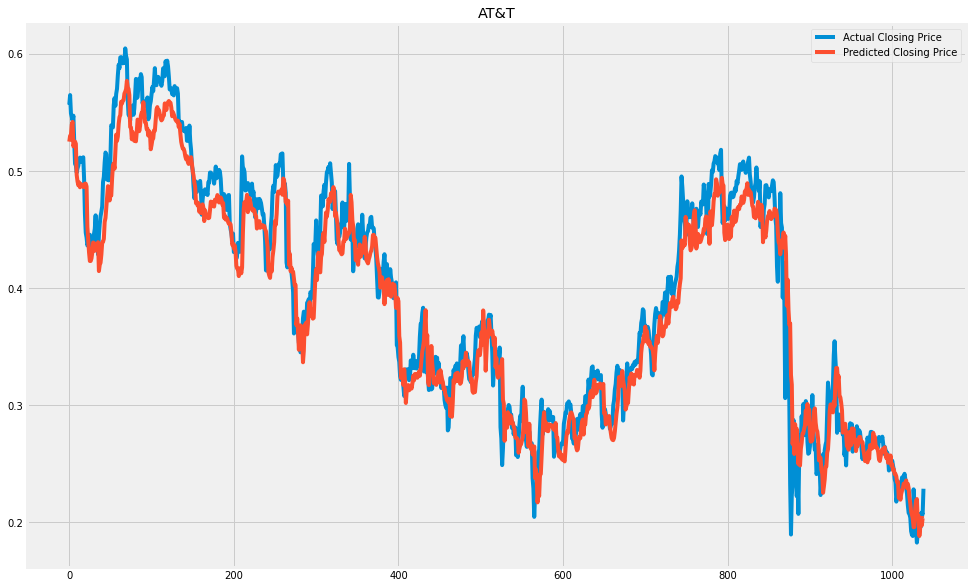

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(y_test, label = 'Actual Closing Price')
plt.plot(pred,   label = 'Predicted Closing Price')
plt.title("AT&T")
plt.legend()
plt.show()

**Thank You**